In [8]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\NVDA_historical_data.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [5]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\NVDA_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\NVDA_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                               fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

           Close        SMA        RSI      MACD  MACD_Signal  MACD_Hist
200     0.058854   0.042845  53.045690  0.002774     0.000847   0.001927
201     0.060547   0.042922  53.316937  0.003309     0.001339   0.001970
202     0.059635   0.043011  53.150705  0.003618     0.001795   0.001823
203     0.059115   0.043098  53.055915  0.003778     0.002192   0.001586
204     0.063281   0.043207  53.720481  0.004192     0.002592   0.001600
...          ...        ...        ...       ...          ...        ...
6416  114.250000  78.288715  57.747762 -0.007652     1.879233  -1.886885
6417  112.279999  78.621305  57.390358 -0.817813     1.339824  -2.157637
6418  113.059998  78.960240  57.495039 -1.381013     0.795656  -2.176669
6419  111.589996  79.289200  57.228737 -1.923793     0.251767  -2.175559
6420  103.730003  79.573820  55.838903 -2.954132    -0.389413  -2.564719

[6221 rows x 6 columns]


In [3]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())

Historical Data:
         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   0.041562   510480000   
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   0.038337   343200000   
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   0.038218   244368000   
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   0.038098   227520000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
# Create a Ticker object for NVDA
ticker = yf.Ticker("NVDA")

In [5]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                       2024-01-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                           0.12   
Normalized EBITDA                                   35583000000.0   
Total Unusual Items                                           0.0   
Total Unusual Items Excluding Goodwill                        0.0   
Net Income From Continuing Operation Net Minori...  29760000000.0   
Reconciled Depreciation                              1508000000.0   
Reconciled Cost Of Revenue                          16621000000.0   
EBITDA                                              35583000000.0   
EBIT                                                34075000000.0   
Net Interest Income                                   609000000.0   
Interest Expense                                      257000000.0   
Interest Income                                       866000000.0   
Normalized Income    

In [6]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                     2024-01-31  \
Treasury Shares Number                                      NaN   
Ordinary Shares Number                            24640000000.0   
Share Issued                                      24640000000.0   
Net Debt                                           2429000000.0   
Total Debt                                        11056000000.0   
...                                                         ...   
Allowance For Doubtful Accounts Receivable                  NaN   
Gross Accounts Receivable                                   NaN   
Cash Cash Equivalents And Short Term Investments  25984000000.0   
Other Short Term Investments                      18704000000.0   
Cash And Cash Equivalents                          7280000000.0   

                                                     2023-01-31  \
Treasury Shares Number                                      NaN   
Ordinary Shares Number                       

In [7]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                   2024-01-31     2023-01-31  \
Free Cash Flow                                  27021000000.0   3808000000.0   
Repurchase Of Capital Stock                     -9533000000.0 -10039000000.0   
Repayment Of Debt                               -1250000000.0            0.0   
Issuance Of Debt                                          0.0            0.0   
Capital Expenditure                             -1069000000.0  -1833000000.0   
Interest Paid Supplemental Data                   252000000.0    254000000.0   
Income Tax Paid Supplemental Data                6549000000.0   1404000000.0   
End Cash Position                                7280000000.0   3389000000.0   
Beginning Cash Position                          3389000000.0   1990000000.0   
Changes In Cash                                  3891000000.0   1399000000.0   
Financing Cash Flow                            -13633000000.0 -11617000000.0   
Cash Flow From Con

In [9]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [10]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

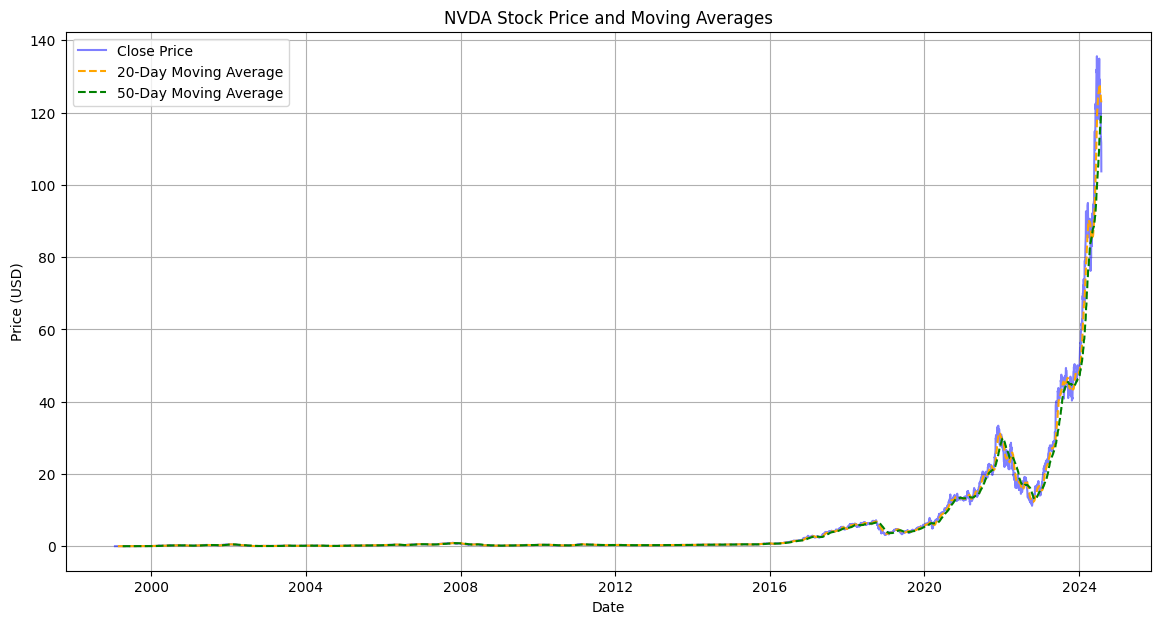

In [11]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('NVDA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()